In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('ecomm_data.csv',encoding='unicode_escape')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.dropna(axis='index',how='all',subset=['CustomerID'], inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [32]:
#df.info()
df.duplicated().sum()#no. of duplictes present 

5225

In [16]:
df_filt=df.drop_duplicates()
df_filt.duplicated().sum()
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [19]:
df_filt.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)


,Country,CustomerID
35,United Kingdom,356728
14,Germany,9480
13,France,8475
10,EIRE,7475
30,Spain,2528
23,Netherlands,2371
3,Belgium,2069
32,Switzerland,1877
26,Portugal,1471
0,Australia,1258


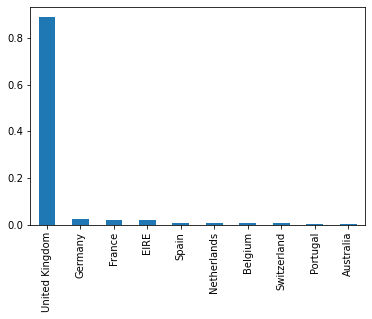

In [33]:
df_filt.Country.value_counts(normalize=True)[:10].plot(kind="bar")

In [34]:
df_uk = df_filt[df_filt['Country']=='United Kingdom']
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356728 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    356728 non-null  object 
 1   StockCode    356728 non-null  object 
 2   Description  356728 non-null  object 
 3   Quantity     356728 non-null  int64  
 4   InvoiceDate  356728 non-null  object 
 5   UnitPrice    356728 non-null  float64
 6   CustomerID   356728 non-null  float64
 7   Country      356728 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.5+ MB


In [35]:
# Unit Price & Quality Checking if any garbage values
x=df_uk.UnitPrice.min()
y=df_uk.Quantity.min()
print(x ,"&", y) 

0.0 & -80995


In [41]:
#Filtering out
df_uk = df_uk[(df_uk['Quantity']>0)]
#df_uk.Quantity.min()

In [47]:
df_uk.describe()

,Quantity,UnitPrice,CustomerID,TotalAmt
count,349227.000000,349227.000000,349227.000000,349227.000000
mean,12.181295,2.972124,15548.333625,20.860428
std,191.797470,17.990307,1594.403077,328.406035
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,14191.000000,4.200000
50%,4.000000,1.950000,15518.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.850000
max,80995.000000,8142.750000,18287.000000,168469.600000


### Recency

In [43]:
df_uk['InvoiceDate']=pd.to_datetime(df_uk['InvoiceDate'])

In [57]:
df_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [58]:
last_date=dt.datetime(2011,12,10)

In [46]:
df_uk.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Frequency

frequency would be number of unique purchase requests made by the customer

### Monetary

In [ ]:
df_uk['TotalAmt']=df_uk['Quantity']*df_uk['UnitPrice'] 

### RFM Values 

In [56]:

RFMscores= df_uk.groupby('CustomerID').agg({'InvoiceDate': lambda x: (last_date - x.max()).days, 'InvoiceNo': lambda x: x.nunique(), 'TotalAmt': lambda x: x.sum()})

RFMscores['InvoiceDate']=RFMscores['InvoiceDate'].astype(int)
RFMscores.rename(columns={
    'InvoiceDate' : 'Recency',
    'InvoiceNo' : 'Frequency',
    'TotalAmt' : 'Monetary'
}, inplace=True)
RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,11,4196.01
2,12748.0,0,210,33053.19
3,12749.0,3,5,4090.88
4,12820.0,3,4,942.34


In [60]:
RFMscores.describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,91.722265,4.246111,1857.950687
std,99.528532,7.205750,7477.736186
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,298.110000
50%,50.000000,2.000000,644.300000
75%,142.000000,5.000000,1570.810000
max,373.000000,210.000000,259657.300000


In [63]:
quantiles = RFMscores.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,298.11
0.50,50.0,2.0,644.30
0.75,142.0,5.0,1570.81


In [64]:
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 298.11, 0.5: 644.3, 0.75: 1570.81}}

In [65]:
#Creating R F M segments
def Rscoring(a,p,d):
    if a <= d[p][0.25]:
        return 1
    elif a <= d[p][0.50]:
        return 2
    elif a <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMscoring(a,p,d):
    if a <= d[p][0.25]:
        return 4
    elif a <= d[p][0.50]:
        return 3
    elif a <= d[p][0.75]:
        return 2
    else:
        return 1

In [66]:
RFMscores['R']=RFMscores['Recency'].apply(Rscoring,args=('Recency',quantiles,))
RFMscores['F']=RFMscores['Frequency'].apply(FnMscoring,args=('Frequency',quantiles,))
RFMscores['M']=RFMscores['Monetary'].apply(FnMscoring,args=('Monetary',quantiles,))
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,11,4196.01,1,1,1
12748.0,0,210,33053.19,1,1,1
12749.0,3,5,4090.88,1,2,1
12820.0,3,4,942.34,1,2,2


In [67]:
#concatenated RFM scores
RFMscores['RFMGroup']=RFMscores.R.map(str) + RFMscores.F.map(str)+RFMscores.M.map(str)
#total sum of the RFM values
RFMscores['RFMScore']=RFMscores[['R','F','M']].sum(axis=1)
RFMscores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,11,4196.01,1,1,1,111,3
12748.0,0,210,33053.19,1,1,1,111,3
12749.0,3,5,4090.88,1,2,1,121,4
12820.0,3,4,942.34,1,2,2,122,5
12821.0,214,1,92.72,4,4,4,444,12
12822.0,70,2,948.88,3,3,2,332,8
12823.0,74,5,1759.50,3,2,1,321,6
12824.0,59,1,397.12,3,4,3,343,10


# Customer Ctegories

In [68]:
print("Best Customers: ",len(RFMscores[RFMscores['RFMGroup']=='111']))
print('Loyal Customers: ',len(RFMscores[RFMscores['F']==1]))
print("Big Spenders: ",len(RFMscores[RFMscores['M']==1]))
print('Almost Lost: ', len(RFMscores[RFMscores['RFMGroup']=='134']))
print('Lost Customers: ',len(RFMscores[RFMscores['RFMGroup']=='344']))
print('Lost Cheap Customers: ',len(RFMscores[RFMscores['RFMGroup']=='444']))

Best Customers:  423
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  31
Lost Customers:  185
Lost Cheap Customers:  395
